# Week 3: Filtering, Splitting and More

This week we continued working with the dataset that we started with, the buildings owned by the state of Illinois, but we're going to continue by looking at some filtering and splitting steps.

We're going to build out some of the tools we need, and which we will utilize as provided by libraries like pandas, by examining the operations step by step.

Let's do our standard imports.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np

## Functions

The first thing we're going to look at is the concept of functions, and the way that input and output can either pass through unmodified, or be modified.

For the most part, we are going to want to have our functions operate *immutably*.  That means that they should not modify the values in-place, but instead return a modified value.  For instance, here is an operation that multiplies by two.

In [3]:
def mult_by_two(a):
    return a * 2

If we do this to an integer value, we'll get what we expect.

In [4]:
mult_by_two(100)

200

But, if we use it on a *list*, we will get something that we might not expect!

In [5]:
b = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mult_by_two(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

As you can see, multiplying a list by two doesn't do an elementwise operation, but instead returns the list concatenated with itself.  (And if the values inside are mutable, they can be modified in place, but we can return to that notion later.)

If we wanted to do an elementwise operation, it's better and easier to use numpy arrays.

In [6]:
import numpy as np
c = np.array(b)
mult_by_two(c)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

As you can see, *here*, we can get our elementwise operation just as we wanted.

Note that although we can multiple by two, we can't divide lists, or add non-lists to lists.

In [7]:
b / 2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [8]:
b + 10

TypeError: can only concatenate list (not "int") to list

In [9]:
b + b

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Addition, subtraction, etc, work on arrays as well, elementwise.

In [10]:
c + 10

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

Here is a function that modifies a value *in-place*.  This is generally *not* what we want to do.

In [11]:
def mult_by_3(a):
    a *= 3

For things like `100`, which are immutable and not objects, this function returns nothing and is not useful.

In [12]:
mult_by_3(100)

But for lists and arrays, it *is* useful, albeit in a way we probably don't want.

In [13]:
mult_by_3(c)
c

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30])

## Data Typing

We're now going to start looking at the dataset from last week, the Building Inventory, but also start to build out functions to pull out things we're interested in.

We'll start, as before, with reading the data into python.

In [14]:
data = {}
with open("/data/Building_Inventory.csv", "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    for k in header:
        data[k] = []
    for row in reader:
        for k, v in zip(header, row):
            data[k].append(v)

As before, we've got our header here, which we can look at.  We'll look at how to apply different categories of value to each column in a moment.  First, we see which columns we have.

In [15]:
header

['Agency Name',
 'Location Name',
 'Address',
 'City',
 'Zip code',
 'County',
 'Congress Dist',
 'Congressional Full Name',
 'Rep Dist',
 'Rep Full Name',
 'Senate Dist',
 'Senator Full Name',
 'Bldg Status',
 'Year Acquired',
 'Year Constructed',
 'Square Footage',
 'Total Floors',
 'Floors Above Grade',
 'Floors Below Grade',
 'Usage Description',
 'Usage Description 2',
 'Usage Description 3']

There are some obvious ones -- for instance, we know that congressional districts will be integers, that the square footage will be a float (or potentially an integer), and so on.

What we will do is construct a mapping of column name to data type, using a dict.

In [16]:
value_types = {'Zip code': 'int',
               'Congress Dist': 'int',
               'Senate Dist': 'int',
               'Year Acquired': 'int',
               'Year Constructed': 'int',
               'Square Footage': 'float',
               'Total Floors': 'int',
               'Floors Above Grade': 'int',
               'Floors Below Grade': 'int'}

A method that dictionaries have which we have not used before is to provide a default value.  This means if a key isn't found, instead of erroring out, it will return that value.  This means that we can assume that our columns should be strings unless we override them.

The `.get` method accepts the arguments `key` and `default`.  If `key` is missing, it returns `default`.

In [17]:
value_types.get('Bldg Status', 'str')

'str'

In [18]:
for k in data:
    print("{:30s} => {}".format(k, value_types.get(k, 'str')))

Usage Description              => str
Floors Above Grade             => int
Congressional Full Name        => str
Location Name                  => str
Rep Dist                       => str
Year Constructed               => int
Usage Description 2            => str
Year Acquired                  => int
Agency Name                    => str
County                         => str
Floors Below Grade             => int
Square Footage                 => float
Address                        => str
Usage Description 3            => str
Zip code                       => int
Total Floors                   => int
Senator Full Name              => str
Rep Full Name                  => str
Bldg Status                    => str
Senate Dist                    => int
Congress Dist                  => int
City                           => str


Now we can replace in-place the data rows with numpy arrays of the correct type.  Numpy "string" arrays are a bit odd, but we will use them anyway.

In [19]:
for k in data:
    data[k] = np.array(data[k], dtype=value_types.get(k, 'str'))

In [20]:
data['Zip code']

array([61501, 61501, 61501, ..., 60449, 60120, 60482])

Note that the string arrays are set to dtype `U` and then a number.  The number is the maximum length of all the entries in the column.  `U` means unicode.

In [21]:
data['Bldg Status']

array(['In Use', 'In Use', 'In Use', ..., 'In Use', 'In Use', 'In Use'], 
      dtype='<U11')

We can do some of our operations on these string arrays, like `unique`.

In [22]:
np.unique(data['Bldg Status'])

array(['Abandon', 'In Progress', 'In Use'], 
      dtype='<U11')

`Square Footage` is just what we expect.

In [23]:
data['Square Footage']

array([   144.,    144.,    144., ...,  13387.,   3793.,   3793.])

## Data Filtering

We're going to start working on building filtering functions.  As we explore the data, we want to be able to select those points that we are interested in, or to filter out those that we are not interested in.

We'll start by writing functions that filter based on equality, less-than, and greater-than.  These will accept an "input" data object, a column to filter on, and the value to compare that column with.

We will make use of the numpy `==` operation and boolean indexing here.

In [24]:
def filter_equals(inp, column, value):
    output = {}
    good = inp[column] == value
    for k in inp:
        output[k] = inp[k][good]
    return output

Let's filter on the things we think are picnic shelters.  We feed in our input data and get back a similarly built object, but just with the square footage equal to 144.

In [25]:
picnic_shelters = filter_equals(data, 'Square Footage', 144)
picnic_shelters['Year Constructed'].size

360

Which agencies have buildings of this size?

In [26]:
np.unique(picnic_shelters['Agency Name'])

array(['Department of Corrections', 'Department of Human Services',
       'Department of Military Affairs', 'Department of Natural Resources',
       'Department of State Police', 'Department of Transportation',
       'Historic Preservation Agency', 'Southern Illinois University'], 
      dtype='<U41')

Let's filter so we have only those that are by the Department of Natural Resources.  Note that here, we're doing *nested* calls to `filter_equals`.

In [27]:
picnic_shelters = filter_equals(
    filter_equals(data, 'Square Footage', 144),
    'Agency Name',
    'Department of Natural Resources')

Let's plot our data, see what we see.  For starters, you might ask, "Are any of these *purchased*?  Or are they all built?  So let's see what the relationship is between the year acquired and the year constructed.

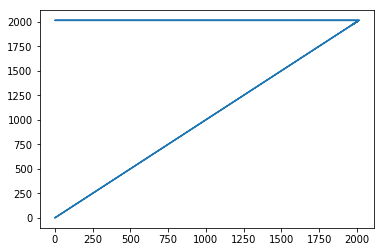

In [28]:
plt.plot(picnic_shelters['Year Acquired'], picnic_shelters['Year Constructed'])

Ah hah!  We see here that there's an obvious coding error, again, where we have some "Year Zero" items.  Let's filter those out by creating a `filter_gt` function that operates similarly to our `filter_equals` function.

In [29]:
def filter_gt(inp, column, value):
    output = {}
    good = inp[column] > value
    for k in inp:
        output[k] = inp[k][good]
    return output

Now let's filter out our picnic shelters, putting the results back into the `picnic_shelters` name.  We'll filter both the constructed and acquired years to be greater than zero.

In [30]:
picnic_shelters = filter_gt(
    filter_gt(picnic_shelters, 'Year Constructed', 0),
    'Year Acquired', 0)

Now, let's plot!

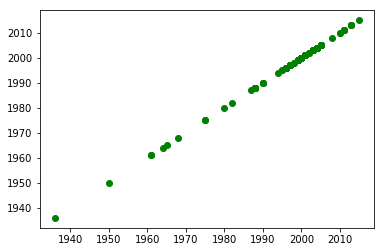

In [31]:
plt.plot(picnic_shelters['Year Acquired'],
         picnic_shelters['Year Constructed'],
         'og')

Starting to look like they were all built the same time they were bought.  That's about what we'd expect.

We will now move on to filtering based on less than and not equal.

In [32]:
def filter_lt(inp, column, value):
    output = {}
    good = inp[column] < value
    for k in inp:
        output[k] = inp[k][good]
    return output

In [33]:
def filter_ne(inp, column, value):
    output = {}
    good = inp[column] != value
    for k in inp:
        output[k] = inp[k][good]
    return output

In [34]:
data['Year Acquired'].size

8849

Let's filter all the buildings from after 1800 that are more than 0 square feet.

In [35]:
buildings = filter_gt(filter_gt(data, 'Year Acquired', 1800),
                      'Square Footage', 0)

In [36]:
buildings['Year Acquired'].size

8586

What does our spread look like?  We're going to make a log-y, linear-x plot.

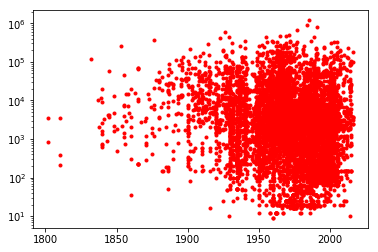

In [37]:
plt.semilogy(buildings['Year Acquired'], buildings['Square Footage'], '.r')

Now, let's see how many unique years that the state has acquired buildings during.

In [38]:
np.unique(buildings['Year Acquired']).size

167

Let's define another operation; this one will find the value in `output_col` as a function of the max in `col`.  This means we will, for instance, be able to find the max value of `Square Footage` for every year that buildings were acquired.

In [39]:
def max_by(inp, col, output_col):
    col_keys = np.unique(inp[col])
    col_vals = []
    for key in col_keys:
        good = inp[col] == key
        col_vals.append(inp[output_col][good].max())
    return col_keys, np.array(col_vals)

We define it such that the unique years are returned, as well as the values in those years.  This makes it easier to plot.

In [40]:
years, sqf_max = max_by(buildings, 'Year Acquired', 'Square Footage')

In [41]:
data['Square Footage'][data['Year Acquired'] == 1802].max()

3594.0

We will do the same thing, but minimizing, with `min_by`.

In [42]:
def min_by(inp, col, output_col):
    col_keys = np.unique(inp[col])
    col_vals = []
    for key in col_keys:
        good = inp[col] == key
        col_vals.append(inp[output_col][good].min())
    return col_keys, np.array(col_vals)

In [43]:
years, sqf_min = min_by(buildings, 'Year Acquired', 'Square Footage')

Now let's plot these values.  This will provide a bracketing, so we can see the minimum and the maximum for every year.  We'll do red line brackets and green dot plotting.

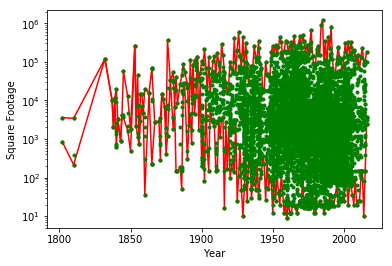

In [44]:
plt.semilogy(years, sqf_min, '-r.')
plt.semilogy(years, sqf_max, '-r.')
plt.semilogy(buildings['Year Acquired'], buildings['Square Footage'], '.g')
plt.xlabel('Year')
plt.ylabel('Square Footage')

As you can see, the plot is incredibly noisy!  There *might* be a trend in the min/max spread, but it's really tough to pick out.  The actual values vary considerably from year to year.

## Binning and Smoothing

We're going to smooth our data.  This will help us pick out any large scale trends, while ignoring the trends on a cycle-by-cycle basis.  In general, this is something that will help explore data, but should be applied with care.

Our data is highly non-gaussian; in practice, this means that some statistical measures won't work.  But we may still be able to pick out trends and changes over time.

A numpy operation that is particularly useful for binning is `mgrid`.  This provides a regularly spaced grid, and can go either by discrete interval or by the number of steps.  The slice provided to `np.mgrid` provides the starting point, the ending point and the step.  If the step is complex, which is indicated via the suffix `j`, it will provide the *number* of steps between min and max (inclusive).  If it's non-complex, it will be the step-size and will be non-inclusive.

So we can do 1800-1820 in steps of 10:

In [45]:
np.mgrid[1800:1820:10]

array([1800, 1810])

But, it's non-inclusive.  So we add on an additional:

In [46]:
np.mgrid[1800:1830:10]

array([1800, 1810, 1820])

(We could have done anything bigger than 1820 there; even 1820.00001 would have worked.)  But it's often easier to give starting/stopping and then ask for a particular number of intervals.  For instance, this asks for 4 intervals between 1800 and 1830:

In [47]:
np.mgrid[1800:1830:4j]

array([ 1800.,  1810.,  1820.,  1830.])

Let's compute the min and the max years for our acquired buildings.

In [48]:
min_year = buildings['Year Acquired'].min()
max_year = buildings['Year Acquired'].max()

In [49]:
min_year, max_year

(1802, 2016)

Now, let's say that we want 33 values between our min and max.  We will be using these for binning, which means that we are susceptible to [fencepost errors](https://en.wikipedia.org/wiki/Off-by-one_error).  We are generating the bin *edges*, not the values in the bins.  So by generating 33 bin *edges*, we create 32 *bins*.

In [50]:
bins = np.mgrid[min_year:max_year:33j]

In [51]:
bins[0], bins[1]
bins[1], bins[2]
bins[2], bins[3]

(1815.375, 1822.0625)

Let's write a function to compute the min/max within each bin.  We will do something similar to what we did before, but this time we will iterate over each bin.  The process here is:

 * Iterate over each bin
 * Find all the values in our column within that bin
 * Add the min/max values for the output column to our lists

This will give us the extrema values for each column.

In [52]:
def bin_extrema(inp, bins, col, output_col):
    col_min = []
    col_max = []
    for i in range(bins.size - 1):
        good = (inp[col] >= bins[i]) & (inp[col] < bins[i+1])
        col_min.append(inp[output_col][good].min())
        col_max.append(inp[output_col][good].max())
    return np.array(col_min), np.array(col_max)

Let's restrict our examination to the 20th century.

In [53]:
buildings_20 = filter_gt(buildings, 'Year Acquired', 1900)

In [54]:
min_year = buildings_20['Year Acquired'].min()
max_year = buildings_20['Year Acquired'].max()

## Side Discussion: Widgets

We're going to start using a tool called `ipywidgets`.  You can find out more at [the documentation](http://ipywidgets.readthedocs.org).  The basic idea is that we can provide little tools for modifying input values, and then have functions automatically update their output based on those inputs.

These widgets can be used in Jupyter notebooks, and in particular Python kernels in Jupyter notebooks.

This comes in handy when we're exploring datasets, or experimenting with parameters for visualization and data reduction.  We will use them here to explore how smoothing and binning modifies the resultant visualizations.

Let's define a function that "bins by year", which takes our data, the number of bin edges to use, and computes the extrema in each bin, then plots the results.

In [55]:
def bin_by_year(nbins = 9):
    bins = np.mgrid[min_year:max_year:nbins*1j]
    min_sqf, max_sqf = bin_extrema(buildings_20, bins,
                               'Year Acquired', 'Square Footage')
    plt.semilogy(bins[:-1], min_sqf, '-r', drawstyle='steps-post')
    plt.semilogy(bins[:-1], max_sqf, '-r', drawstyle='steps-post')
    plt.plot(buildings_20['Year Acquired'],
             buildings_20['Square Footage'],
             '.g')

If we were to call this, by default it will use 9 bin edges and then plot the extrema in those bins.  But, what we really want to do is be able to modify the number of bins easily, and see how that changes things.  So we will use `ipywidgets.interact` to do this.

We will provide it a function, and then for the variable we will provide the min and max values that we want it to have.  We'll assume that we want between 2 bin edges and 65 bin edges.

<function __main__.bin_by_year>

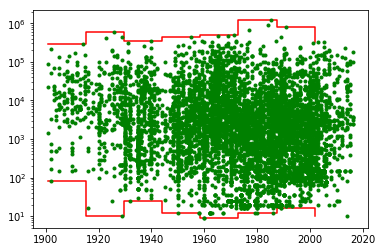

In [56]:
import ipywidgets
ipywidgets.interact(bin_by_year, nbins=(2, 65))

Now we have some neat little lines, but we still have some incredibly confusing visual language.  Let's explore how to fix this.

## Back to Smoothing and Binning

Now that we know how to experiment with widgets, we will start to augment our plots and clean up their visual language.

Instead of plotting every point, let's start by taking some statistical measures of the data.

One important piece of information is that the distribution is non-Gaussian.  The standard deviation may thus be less of a useful measure than otherwise; we will compute it, and plot the upper end.

Let's compute some very simple statistics for each bin.  We'll do min, max, mean and standard deviation.

In [57]:
def bin_stats(inp, bins, col, output_col):
    col_min = []
    col_max = []
    col_std = []
    col_avg = []
    for i in range(bins.size - 1):
        good = (inp[col] >= bins[i]) & (inp[col] < bins[i+1])
        col_min.append(inp[output_col][good].min())
        col_max.append(inp[output_col][good].max())
        col_std.append(inp[output_col][good].std())
        col_avg.append(inp[output_col][good].mean())
    return np.array(col_min), np.array(col_max), \
            np.array(col_std), np.array(col_avg)

Using `ipywidgets` as before, we'll set up a function to plot the year and square footage, but to augment this plot with some of the other statistical measures.  Let's show the mean, the min, the max, and then one standard deviation away.  (The gigantic spread, along with the non-Gaussianity, means that our mean minus our standard deviation goes below the minimum.)

<function __main__.bin_by_year_stats>

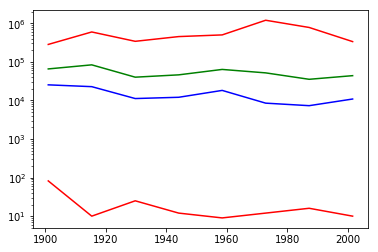

In [58]:
def bin_by_year_stats(nbins = 9):
    bins = np.mgrid[min_year:max_year:nbins*1j]
    min_sqf, max_sqf, std_sqf, avg_sqf = bin_stats(buildings_20, bins,
                               'Year Acquired', 'Square Footage')
    plt.semilogy(bins[:-1], min_sqf, '-r')
    plt.semilogy(bins[:-1], max_sqf, '-r')
    plt.semilogy(bins[:-1], avg_sqf, '-b')
    plt.semilogy(bins[:-1], avg_sqf + std_sqf, '-g')
    plt.semilogy(bins[:-1], avg_sqf - std_sqf, '-g')

ipywidgets.interact(bin_by_year_stats, nbins=(1, 65))

Cool!  We now have a bad-looking line plot.  How do we improve this?  We can indicate the total spread by using `fill_between`, which is a matplotlib function that accepts an upper bound and a lower bound.  We'll plot the average on top of that.

<function __main__.bin_by_year_stats>

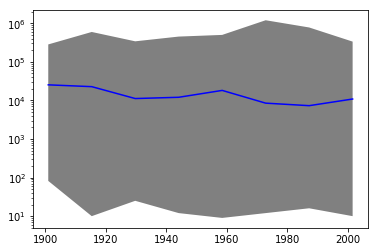

In [59]:
def bin_by_year_stats(nbins = 9):
    bins = np.mgrid[min_year:max_year:nbins*1j]
    min_sqf, max_sqf, std_sqf, avg_sqf = bin_stats(buildings_20, bins,
                               'Year Acquired', 'Square Footage')
    plt.fill_between(bins[:-1], min_sqf, max_sqf, facecolor = 'grey')
    plt.semilogy(bins[:-1], avg_sqf, '-b')
ipywidgets.interact(bin_by_year_stats, nbins=(1,65))

Let's compare this to the scatter plot.  Note that neither the plot above nor this next plot give any impression of the density of values.

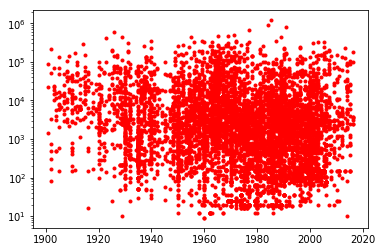

In [60]:
plt.semilogy(buildings_20['Year Acquired'], buildings_20['Square Footage'], '.r')

There's an automated method of binning in two dimensions called `hexbin`.  We can use that here, along with a lot color scale.

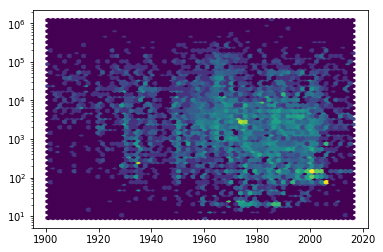

In [61]:
plt.hexbin(buildings_20['Year Acquired'], buildings_20['Square Footage'], gridsize = 64, yscale='log', bins='log')

## Side Discussion: Alpha

Alpha values haven't come up yet in our discussions, but they play a role when attempting to communicate multiple pieces of information simultaneously.  When the visualization engine (in this case, matplotlib) composites multiple overlapping components, the "alpha" value is used to see how they blend together.  When the "top" object is completely opaque (i.e., `alpha == 1.0`) it will override any of the lower items in the layers.  When it is lower than 1.0, it will be blended.

We can demonstrate this by creating two circles that partially overlap and setting their alpha to less than 1.0.

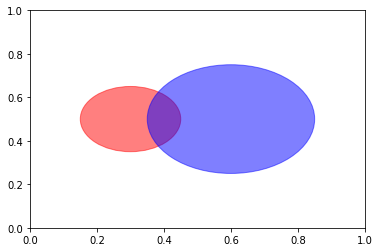

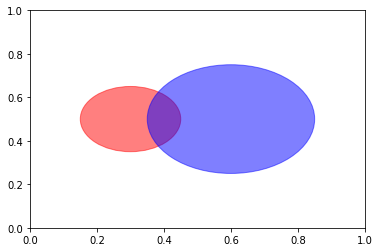

In [62]:
circle1 = plt.Circle( (0.3, 0.5), 0.15, alpha = 0.5, color = "red")
circle2 = plt.Circle( (0.6, 0.5), 0.25, alpha = 0.5, color = "blue")
ax = plt.gca()
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.gcf()

## Back to Lines and Fills

Returning to the lines and fills we'd dealt with before, let's now use our new alpha-blending capabilities to build a plot where we can show a standard deviation (which in this case isn't *that* helpful) and the min/max range, and vary that based on bin count.

We'll write a new function and use our method of `ipywidgets.interact` to change the bin width.  We'll use two sets of `fill_between` of less than 1.0 alpha to show the two regions.

<function __main__.bin_by_year_stats>

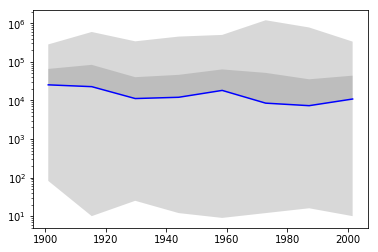

In [63]:
def bin_by_year_stats(nbins = 9):
    bins = np.mgrid[min_year:max_year:nbins*1j]
    min_sqf, max_sqf, std_sqf, avg_sqf = bin_stats(buildings_20, bins,
                               'Year Acquired', 'Square Footage')
    plt.fill_between(bins[:-1], min_sqf, max_sqf, facecolor = 'grey', alpha=0.3)
    plt.fill_between(bins[:-1], avg_sqf, avg_sqf+std_sqf, facecolor = 'grey', alpha=0.3)
    plt.semilogy(bins[:-1], avg_sqf, '-b')
ipywidgets.interact(bin_by_year_stats, nbins=(2,65))

# Splitting Datasets

We may also want to examine these traits based on the specific agency that owns each building.  First, let's see how many unqiue agencies there are for the 20th-century buildings.

In [64]:
np.unique(buildings_20["Agency Name"])

array(['Appellate Court / Fourth District',
       'Appellate Court / Second District', 'Chicago State University',
       'Department of Agriculture',
       'Department of Central Management Services',
       'Department of Corrections', 'Department of Human Services',
       'Department of Juvenile Justice', 'Department of Military Affairs',
       'Department of Natural Resources', 'Department of Public Health',
       'Department of Revenue', 'Department of State Police',
       'Department of Transportation', "Department of Veterans' Affairs",
       'Eastern Illinois University', 'Governors State University',
       'Historic Preservation Agency', 'IL State Board of Education',
       'Illinois Board of Higher Education',
       'Illinois Community College Board', 'Illinois Courts',
       'Illinois Emergency Management Agency',
       'Illinois Medical District Commission', 'Illinois State University',
       'Northeastern Illinois University', 'Northern Illinois University',
 

And now, let's try pulling out just those owned by the University of Illinois.

In [65]:
uiuc_buildings = filter_equals(buildings_20, "Agency Name", "University of Illinois")

In [66]:
uiuc_buildings["Square Footage"].size

506

A fun experiment might be to see if we can find the LIS building -- the one we're taking this class in!  Let's use the `in` operator to find all the buildings where "501" is in the address.

In [67]:
for address in uiuc_buildings["Address"]:
    if "501" in address:
        print(address)

1501 South Oak Street
1501 South Oak Street
501 E Daniel
1501 South Oak Street


We do this so that we can get the exact right spelling.  Looks like it's `501 E Daniel`.  So let's filter out based on that exact address.

In [68]:
lis_building = filter_equals(uiuc_buildings, "Address", "501 E Daniel")


What info can we find?

In [69]:
lis_building

{'Address': array(['501 E Daniel'], 
       dtype='<U60'), 'Agency Name': array(['University of Illinois'], 
       dtype='<U41'), 'Bldg Status': array(['In Use'], 
       dtype='<U11'), 'City': array(['Champaign'], 
       dtype='<U17'), 'Congress Dist': array([13]), 'Congressional Full Name': array(['Rodney L. Davis'], 
       dtype='<U23'), 'County': array(['Champaign'], 
       dtype='<U11'), 'Floors Above Grade': array([4]), 'Floors Below Grade': array([1]), 'Location Name': array(['University of Illinois Urbana-Champaign'], 
       dtype='<U66'), 'Rep Dist': array(['103'], 
       dtype='<U3'), 'Rep Full Name': array(['Ammons Carol'], 
       dtype='<U22'), 'Senate Dist': array([52]), 'Senator Full Name': array(['Scott M. Bennett'], 
       dtype='<U24'), 'Square Footage': array([ 21845.]), 'Total Floors': array([5]), 'Usage Description': array(['Assembly'], 
       dtype='<U20'), 'Usage Description 2': array(['Assembly'], 
       dtype='<U20'), 'Usage Description 3': array(['Not

In [70]:
lis_building["Square Footage"], lis_building["Year Acquired"]

(array([ 21845.]), array([1992]))

The building was acquired in 1992 (from the Acacia Fraternity) and is about 22,000 square feet.  Neat!

## Side Discussion: Transforms

We've spent some time in this course talking about the distinction between "data" coordinates and "plot" coordinates, and in particular how using one instead of the other can be deceptive.  Matplotlib has a notion of the transformation between different coordinate systems and it calls these [transforms](http://matplotlib.org/users/transforms_tutorial.html).  We will use a set of transforms to add an annotation to our plot, showing the year in which the LIS building was acquired by the University.

We will use the `blended_transform_factor` to blend a data-space transformation (for the x axis) with a plot-space transformation (for the y axis) and then use this to add a solid red line over all of 1992.

First we do our standard plotting.  Then, we create a transform that uses these two different coordinate systems.  Using this transform, we create a `Rectangle` patch that is one year wide and 1.0 axes units tall, and add that to the plot.

<function __main__.bin_by_year_stats>

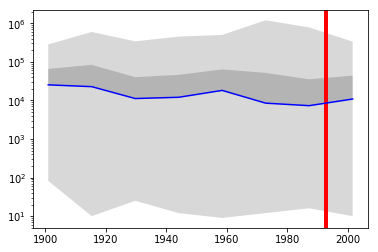

In [71]:
import matplotlib.transforms

def bin_by_year_stats(nbins = 9):
    bins = np.mgrid[min_year:max_year:nbins*1j]
    min_sqf, max_sqf, std_sqf, avg_sqf = bin_stats(buildings_20, bins,
                               'Year Acquired', 'Square Footage')
    plt.fill_between(bins[:-1], min_sqf, max_sqf, facecolor = 'grey', alpha=0.3)
    plt.fill_between(bins[:-1], avg_sqf, avg_sqf+std_sqf, facecolor = 'grey', alpha=0.4)
    plt.semilogy(bins[:-1], avg_sqf, '-b')
    ax = plt.gca()
    transform = matplotlib.transforms.blended_transform_factory(
        ax.transData, ax.transAxes)
    circle = plt.Rectangle((1992, 0.0), 1.0, 1.0, color = 'red',
                        transform = transform)
    plt.gca().add_patch(circle)
ipywidgets.interact(bin_by_year_stats, nbins=(1,65))

## Multiplots

Matplotlib provides a simple way to create multiple plots in the same figure object.  It also lets you supply integer indices to them, which means it is straightforward to iterate over them.  The `plt.subplot` command accepts three arguments; the first is the number of plots in the y, the second is the number in the x, and the third is the (1-indexed, *not* 0-indexed) integer index of the plot you want to use next.

Because we're going to be plotting several on the same figure, we will also use a matplotlib configuration variable to make our figure bigger, so that the text is not crowded.  This parameter controls the size of the figures created in *inches*.

In [72]:
plt.rcParams["figure.figsize"] = (12, 10)

Let's try a simple example of just plotting the same data on four subplots.

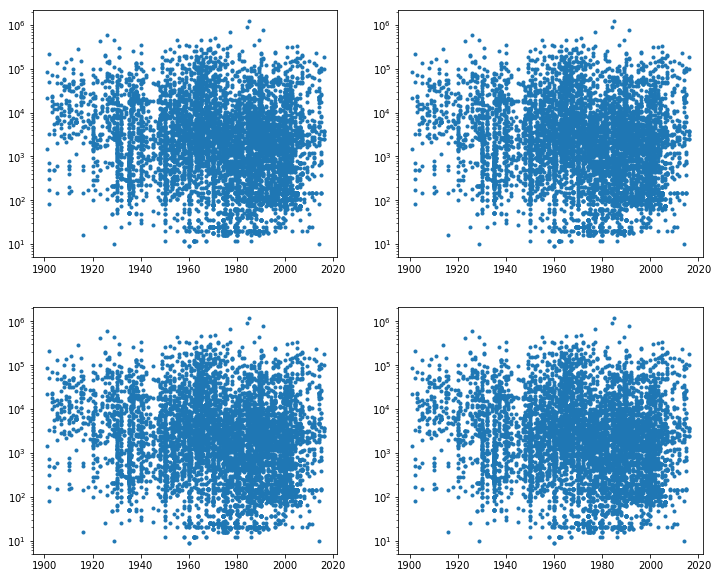

In [73]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.semilogy(buildings_20["Year Acquired"], buildings_20["Square Footage"], '.')

Now that we have our figures big enough, let's figure out what we want to plot.  We will "split" the dataset by filtering based on agency name.  But, we'll just use a couple of the agencies that have many data points; let's take a look at our options.

In [74]:
for agency in np.unique(buildings_20["Agency Name"]):
    filtered = filter_equals(buildings_20, "Agency Name", agency)
    size = filtered["Agency Name"].size
    print(agency, size)

Appellate Court / Fourth District 1
Appellate Court / Second District 1
Chicago State University 14
Department of Agriculture 224
Department of Central Management Services 59
Department of Corrections 1352
Department of Human Services 588
Department of Juvenile Justice 139
Department of Military Affairs 213
Department of Natural Resources 3066
Department of Public Health 2
Department of Revenue 1
Department of State Police 109
Department of Transportation 1075
Department of Veterans' Affairs 75
Eastern Illinois University 34
Governors State University 10
Historic Preservation Agency 233
IL State Board of Education 1
Illinois Board of Higher Education 10
Illinois Community College Board 14
Illinois Courts 1
Illinois Emergency Management Agency 2
Illinois Medical District Commission 3
Illinois State University 101
Northeastern Illinois University 18
Northern Illinois University 72
Office of the Attorney General 1
Office of the Secretary of State 37
Southern Illinois University 403
Univer

Now we pick out four -- let's use DOT, UI, ISU and DHS.

In [75]:
agencies = ["Department of Transportation", "University of Illinois",
            "Illinois State University", "Department of Human Services"]

Now, we'll do a multiplot, using the same method we have used before with applying multiple different pieces of information, one those four agencies.

<function __main__.bin_by_year_stats>

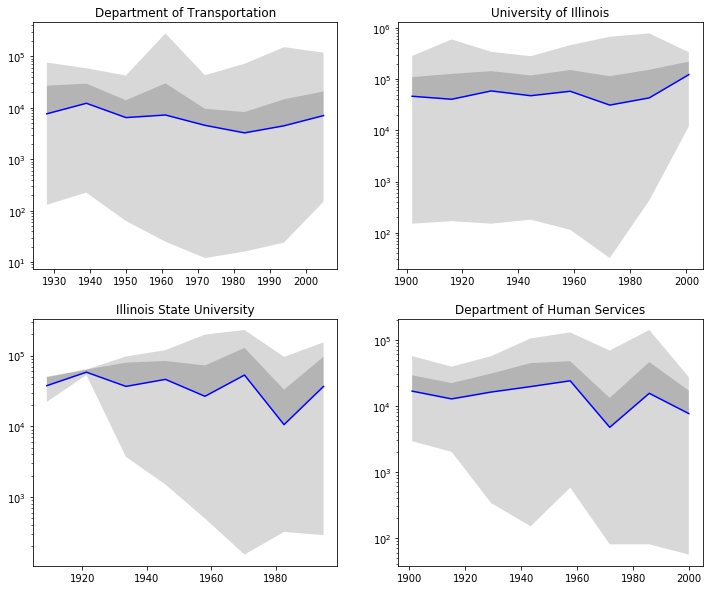

In [76]:
def bin_by_year_stats(nbins = 9):
    for i, agency in enumerate(agencies):
        plt.subplot(2, 2, i + 1)
        agency_bldgs = filter_equals(buildings_20, "Agency Name", agency)
        min_year = agency_bldgs["Year Acquired"].min()
        max_year = agency_bldgs["Year Acquired"].max()
        bins = np.mgrid[min_year:max_year:nbins*1j]
        min_sqf, max_sqf, std_sqf, avg_sqf = bin_stats(agency_bldgs, bins,
                               'Year Acquired', 'Square Footage')
        plt.fill_between(bins[:-1], min_sqf, max_sqf, facecolor = 'grey', alpha=0.3)
        plt.fill_between(bins[:-1], avg_sqf, avg_sqf+std_sqf, facecolor = 'grey', alpha=0.4)
        plt.semilogy(bins[:-1], avg_sqf, '-b')
        plt.title(agency)
ipywidgets.interact(bin_by_year_stats, nbins=(1,12))

And that's it for this week!